In [2]:
#feature extraction from previous segmented images 
#to extract features for each image in the dataset such as texture, color, shape, size, etc
#and store them in a file
import cv2
import os
import csv
import numpy as np
from skimage.feature import hog
from skimage import data, exposure
import pywt
from imutils import face_utils
import numpy as np
from skimage import io, feature, measure
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from skimage.filters import gabor
from skimage import io
from skimage.transform import resize
import cv2
import numpy as np
import os
import csv
import matplotlib.pyplot as plt

In [ ]:
import cv2
import numpy as np
import os

# Set the path to the folder containing the images
folder_path = 'D:\\master_thesis\\datasets\\segmented\\normal'
output_path = 'D:\\master_thesis\\datasets\\feature_extracted\\normal'
# Define the parameters for the Gabor filter
ksize = (31, 31)  # Size of the Gabor kernel
sigma = 5.0  # Standard deviation of the Gaussian envelope
theta = np.pi / 4  # Orientation of the Gabor filter
lambd = 10.0  # Wavelength of the sinusoidal factor
gamma = 0.5  # Spatial aspect ratio
psi = 0  # Phase offset

# Initialize a list to store the extracted features
features = []

# Iterate over each image in the folder
for filename in os.listdir(folder_path):
    # Load the image
    image_path = os.path.join(folder_path, filename)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Create the Gabor kernel
    kernel = cv2.getGaborKernel(ksize, sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F)

    # Apply the Gabor filter to the image
    filtered_image = cv2.filter2D(image, cv2.CV_8UC3, kernel)

    # Extract features from the filtered image
    image_features = filtered_image.flatten()

    # Append the features to the list
    features.append(image_features)

    # Save the extracted features to a file
    feature_file_path = os.path.join(output_path, rf"{filename}_features.npy")
    np.save(feature_file_path, image_features)

# Convert the list of features to a numpy array
features = np.array(features)

# Print the shape of the extracted features
print(features.shape)

In [7]:
# Set the path to the folder containing the images
folder_path = 'D:\\master_thesis\\datasets\\segmented\\pituitary'
output_path = 'D:\\master_thesis\\datasets\\feature_extracted2\\pituitary'
#csv_file_path = 'D:\\master_thesis\\datasets\\feature_extracted2\\glioma\\glioma.csv'

# Define the parameters for the Gabor filter
ksize = (31, 31)  # Size of the Gabor kernel
sigma = 5.0  # Standard deviation of the Gaussian envelope
theta = np.pi / 4  # Orientation of the Gabor filter
lambd = 10.0  # Wavelength of the sinusoidal factor
gamma = 0.5  # Spatial aspect ratio
psi = 0  # Phase offset

# Initialize a list to store the extracted features
features = []

# Iterate over each image in the folder
for filename in os.listdir(folder_path):
    # Load the image
    image_path = os.path.join(folder_path, filename)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Create the Gabor kernel
    kernel = cv2.getGaborKernel(ksize, sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F)

    # Apply the Gabor filter to the image
    filtered_image = cv2.filter2D(image, cv2.CV_32F, kernel)

    # Extract features from the filtered image
    image_features = filtered_image.flatten()

    # Append the features to the list
    features.append(image_features)

    # Save the extracted features to a file
    feature_file_path = os.path.join(output_path, filename)
    cv2.imwrite(feature_file_path, image_features)

    # Print and visualize the Gabor filter
    # plt.imshow(kernel, cmap='gray')
    # plt.title('Gabor Filter')
    # plt.show()

# Convert the list of features to a numpy array
features = np.array(features)

# Save the features in CSV format
# with open(csv_file_path, 'w', newline='') as csv_file:
#     writer = csv.writer(csv_file)
#     writer.writerows(features)

# Print the shape of the extracted features
print(features.shape)



(8226,)


C:\Users\Gowri\AppData\Local\Temp\ipykernel_2996\2071071349.py:45: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  features = np.array(features)


In [8]:
import cv2
import numpy as np
import os

# Set the path to the folder containing the images
folder_path = 'D:\\master_thesis\\datasets\\segmented\\normal'
output_path = 'D:\\master_thesis\\datasets\\feature_extracted\\normal'
# Define the parameters for the Gabor filter
ksize = (31, 31)  # Size of the Gabor kernel
sigma = 5.0  # Standard deviation of the Gaussian envelope
theta = np.pi / 4  # Orientation of the Gabor filter
lambd = 10.0  # Wavelength of the sinusoidal factor
gamma = 0.5  # Spatial aspect ratio
psi = 0  # Phase offset

# Initialize a list to store the extracted features
features = []

# Iterate over each image in the folder
for filename in os.listdir(folder_path):
    # Load the image
    image_path = os.path.join(folder_path, filename)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Create the Gabor kernel
    kernel = cv2.getGaborKernel(ksize, sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F)

    # Apply the Gabor filter to the image
    filtered_image = cv2.filter2D(image, cv2.CV_8UC3, kernel)

    # Extract features from the filtered image
    image_features = filtered_image.flatten()

    # Append the features to the list
    features.append(image_features)

    # Save the extracted features to a file
    feature_file_path = os.path.join(output_path, rf"{filename}_features.npy")
    np.save(feature_file_path, image_features)

# Convert the list of features to a numpy array
features = np.array(features)

# Print the shape of the extracted features
print(features.shape)


(2396,)


C:\Users\Gowri\AppData\Local\Temp\ipykernel_22684\472563600.py:42: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  features = np.array(features)


In [2]:
import cv2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import os

# Path to the directory containing the MRI images
image_dir = 'D:\master_thesis\datasets\segmented\glioma'

# Load the pre-trained VGG16 model
model = cv2.dnn.readNetFromTorch("D:\\master_thesis\\datasets\\segmented\\glioma\\archive\\vgg16_weights_tf_dim_ordering_tf_kernels.h5")

# Initialize lists to store the extracted features and labels
features = []
labels = []

# Iterate over each image file in the directory
for filename in os.listdir(image_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust file extensions if needed
        # Load and preprocess the image
        img_path = os.path.join(image_dir, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))
        blob = cv2.dnn.blobFromImage(img, 1, (224, 224), (103.939, 116.779, 123.68), swapRB=True)

        # Extract features using the VGG16 model
        model.setInput(blob)
        output = model.forward()
        features.append(output.flatten())

        # Extract the label from the filename or any other logic based on your data
        label = filename.split('.')[0]  # Assuming filename format: label.jpg
        labels.append(label)

# Convert the lists to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Apply feature scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=100)  # Adjust the number of components as per your requirements
features_pca = pca.fit_transform(features_scaled)

# Save the extracted features and labels
np.save('features.npy', features_pca)
np.save('labels.npy', labels)


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\torch\torch_importer.cpp:1022: error: (-213:The function/feature is not implemented) Unsupported Lua type in function 'cv::dnn::dnn4_v20221220::TorchImporter::readObject'


TypeError: Image data of dtype object cannot be converted to float

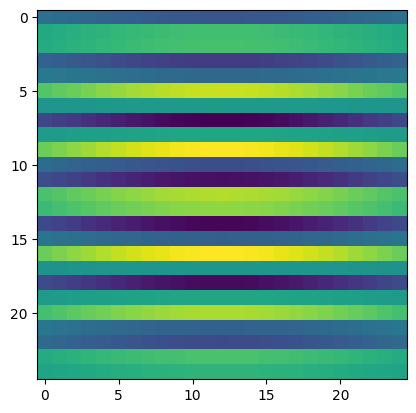

In [17]:
#garbor filter
#input directory
input_path = "D:\master_thesis\datasets\segmented\glioma"

#output directory

output_path = "D:\master_thesis\datasets\feature_extracted\glioma"

#convert to grayscale
#gray = cv2.cvtColor(input_path, cv2.COLOR_BGR2GRAY)

ksize = 25  #Use size that makes sense to the image and fetaure size. Large may not be good. 
#On the synthetic image it is clear how ksize affects imgae (try 5 and 50)
sigma = 10 #Large sigma on small features will fully miss the features. 
theta = 1*np.pi/2  #/4 shows horizontal 3/4 shows other horizontal. Try other contributions
lamda = 1*np.pi/4  #1/4 works best for angled. 
gamma=0.9  #Value of 1 defines spherical. Calue close to 0 has high aspect ratio
#Value of 1, spherical may not be ideal as it picks up features from other regions.
phi = 0.8  #Phase offset. I leave it to 0. (For hidden pic use 0.8)

kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)

plt.imshow(kernel)


img = cv2.imread(input_path) #USe ksize:15, s:5, q:pi/2, l:pi/4, g:0.9, phi:0.8
plt.imshow(img, cmap='gray')

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)

kernel_resized = cv2.resize(kernel, (600, 600))                    # Resize image


plt.imshow(kernel_resized)
plt.imshow(fimg)

cv2.imshow('Kernel', kernel_resized)
cv2.imshow('Original Img.', img)
cv2.imshow('Filtered', fimg)
cv2.waitKey()
cv2.destroyAllWindows()
#





In [12]:
input_path = "D:\master_thesis\datasets\segmented\glioma"
#img = cv2.imread('BSE_Image.jpg')
img = cv2.imread(input_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
#Here, if you have multichannel image then extract the right channel instead of converting the image to grey. 
#For example, if DAPI contains nuclei information, extract the DAPI channel image first. 

#Multiple images can be used for training. For that, you need to concatenate the data

#Save original image pixels into a data frame. This is our Feature #1.
img2 = img.reshape(-1)
df = pd.DataFrame()
df['Original Image'] = img2

#Generate Gabor features
num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
kernels = []  #Create empty list to hold all kernels that we will generate in a loop
for theta in range(8):   #Define number of thetas. Here only 2 theta values 0 and 1/4 . pi 
    theta = theta / 4. * np.pi
    for sigma in (1, 3, 5, 7):  #Sigma with values of 1 and 3
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
                           
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
                print(gabor_label)
                ksize=5  #Try 15 for hidden image. Or 9 for others
                phi = 0  #0.8 for hidden image. Otherwise leave it to 0
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)                
                filtered_img = fimg.reshape(-1)
                
                cv2.imwrite('images/gabor_filtered_images/'+gabor_label+'.jpg', filtered_img.reshape(img.shape))

                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                
                num += 1  #Increment for gabor column label
                
print(df.head())


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [4]:
#Feture extraction using Garbor filter

#defining parameters for the Garbor filter

frequency = 0.6
theta= 0.5
sigma = 3.0
ksize = 5
phi = 0.0

#input directory
input_path = "D:\master_thesis\datasets\segmented\glioma"

#list all the images in the path
image_files = [f for f in os.listdir(input_path) if os.path.isfile(os.path.join(input_path, f))]


#initializing a list to store thr extracted features
features = []

#iterating over each file in input_path
for file in image_files:
    image_path = os.path.join(input_path, file)
    image = io.imread(image_path, as_gray=True)

    #resizing the image to a fixed size
    target_size = (600,600)
    image_resized = resize(image, target_size)

    #applying garbor filter
    garbor_filter_real , garbor_filter_imag = cv2.getGaborKernel(image_resized, frequency, theta, sigma, ksize, phi)

    # Flatten the Gabor filter responses into a feature vector
    features = np.concatenate([garbor_filter_real.flatten(), garbor_filter_imag.flatten()])

    # Append the features to the list
    features.append(features)

# Convert the list of features to a numpy array
features = np.array(features)

# Save the features to a CSV file
output_file = 'D:\master_thesis\features.csv'
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(features)


TypeError: Can't parse 'ksize'. Expected sequence length 2, got 600

In [4]:
# feature extraction using machine learning models -  Random forest classifier
#load the input data
input_data  = ["D:\master_thesis\datasets\segmented\glioma", "D:\master_thesis\datasets\segmented\menin","D:\master_thesis\datasets\segmented\pituitary", "D:\master_thesis\datasets\segmented\normal"]

#lists to store the extracted features and lables
feature = []
target_labels =[]

#extract the features from each iamge in the dataset
for folder_path in input_data:
    label = os.path.basename(folder_path)
    for file_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, file_name)
        image = io.imread(image_path, as_gray=True)

   

    #shape features
    contours = measure.find_contours(image, 0.5) 
    num_countours = len(contours)
    perimeter = np.sum([measure.perimeter(c) for c in contours])

    #texture features 
    lbp = feature.local_binary_pattern(image, P=8, R=1)
    histogram = np.histogram(lbp, bins=256, range=(0,256))[0]
    texture_features = histogram/np.sim(histogram)

    #intensity features
    mean_intensity = np.mean(image)
    std_intensity = np.std(image)

    #combine the extracted features into feature vector
    feature_vector = [num_countours,perimeter] + texture_features.tolist()+ [mean_intensity,std_intensity]

    #append the feature vector and label to repective labels
    feature.append(feature_vector)
    target_labels.append(label)

#convert the features and label lists to numpy arrays
X = np.array(feature)
Y = np.array(target_labels)

#split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

#train a machine learning model
model = RandomForestClassifier()
model.fit(X_train,Y_train)

#make predictions on the test set
y_pred = model

#evaluate the model
accuray = accuracy_score(Y_test, y_pred)
print("Accuracy: ",accuray)
np.savetxt("D:\master_thesis\datasets\segmented\glioma\feature_extraction.csv",X,Y,delimiter=",")

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 50 is different from 256)

In [ ]:
#Feature Extractor using wavelets
class feature_extract:
    def __init__(self, wavelet= 'haar', level=1):
        self.wavelet = wavelet
        self.level = level

    def  extract(self, image):
        #convert image to float and scale to [0,1]
        image = image.astype('float32')/255

        #apply wavelet transform
        coeffs = pywt.wavedec2(image, self.wavelet, level=self.level)
        #extract features
        features = []
        for i, coeffs in enumerate(coeffs):
            if i == 0:
                #approximation coefficients
                features += self._extract_coeff_features(coeffs, 'A')
            
            else:
                #deatil coeeficients
                features += self._extract_coeff_features(coeffs[0], 'H')
                features += self._extract_coeff_features(coeffs[1], 'V')
                features += self._extract_coeff_features(coeffs[2], 'D')

        return features
    
    def _extract_coeff_features(self, coeff, label):
        #calculate statistics for wavelet coefficients
        features = []
        features.append(np.mean(coeff))
        features.append(np.std(coeff))
        features.append(np.median(coeff))
        features.append(np.max(coeff))
        features.append(np.min(coeff))

        # Add label to feature names
        features = [f'{label}_{f}' for f in features]

        return features
    

In [ ]:
#feature extraction using shape based

class shape_features:
    def __init__(self, image):
        self.image = image

    def extract_features(self, image_path):
        image = cv2.imread(image_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # detect and extract features
        detector = dlib.get_frontal_face_detector()
        predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
        faces = detector(gray)
        for face in faces:
            shape = predictor(gray, face)
            shape = face_utils.shape_to_np(shape)
            # loop over the (x, y)-coordinates for the facial landmarks
            # and draw them on the image
            for (x, y) in shape:
                cv2.circle(image, (x, y), 1, (0, 0, 255), -1)
        # show the output image with the face detections + facial landmarks
        cv2.imshow("Output", image)
        cv2.waitKey(0)